# DISTRIBUTION PLOTS

In [74]:
import seaborn as sns

In [75]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

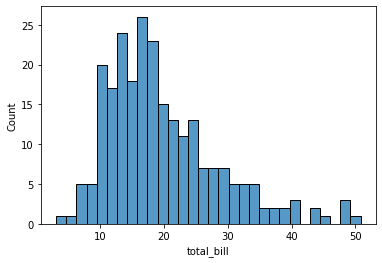

In [12]:
#distplot is a univariate distribution plot. here we want to see how total bill is distributed
sns.histplot(tips['total_bill'],kde = False,bins = 30) #bins attribute defines the number of bins we want in the 
#distribution plot

**jointplot()**

Joint plot allows to combine two distribution plot for bivariate distribution

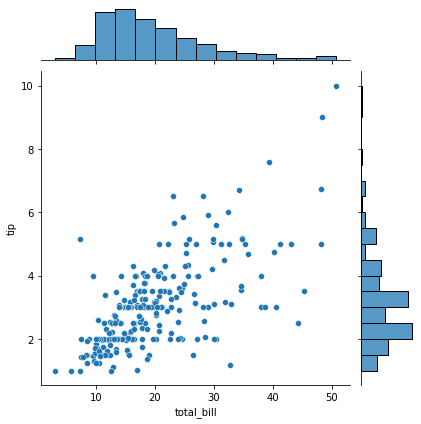

In [17]:
sns.jointplot(x='total_bill',y='tip',data = tips,kind ='scatter') #'kind' argument controls what happens with the center plot

**pairplot()**

Pair Plot will plot the distribution for every possible combinations of the variables in the dataset

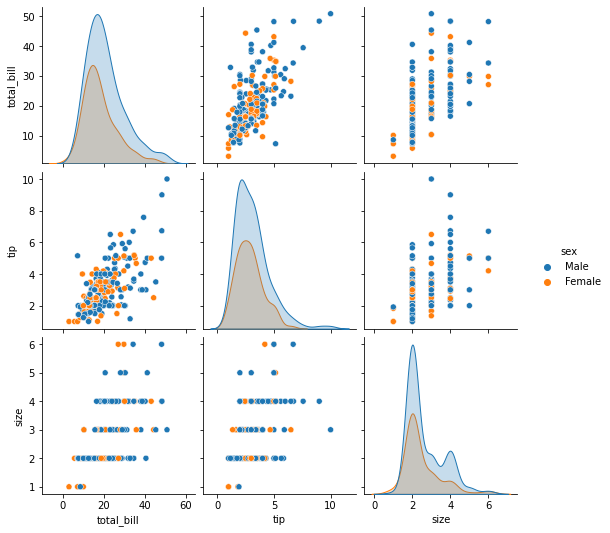

In [19]:
sns.pairplot(tips,hue = 'sex') #'hue' argument takes a categorical column name to color the plots as per the category

**rugplot()**

<AxesSubplot:xlabel='total_bill'>

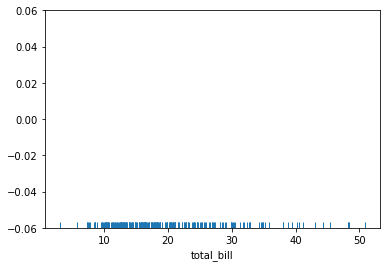

In [20]:
sns.rugplot(tips['total_bill'])

# CATEGORICAL PLOTS

**barplot()**

In [24]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

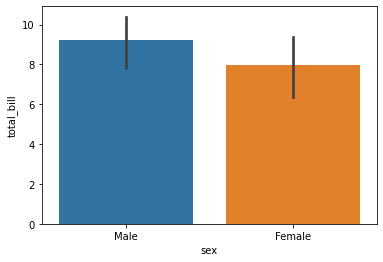

In [25]:
#by default the bar plot gives the average of the categories. we can change the computation by setting the 'estimator' argument
#Here we will set estimator as 'Standard Deviation'
sns.barplot(x='sex',y='total_bill',data=tips,estimator = np.std)

**countplot**

Count plot counts the number of instances for a category in a data

<AxesSubplot:xlabel='sex', ylabel='count'>

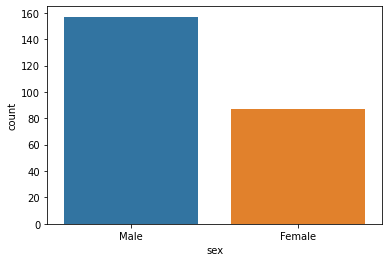

In [26]:
sns.countplot(x='sex',data = tips)

boxplot()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

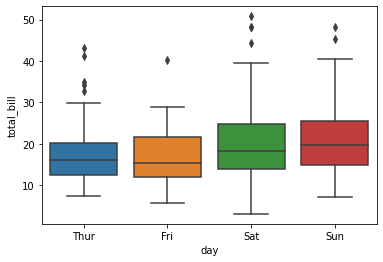

In [29]:
sns.boxplot(x='day',y='total_bill',data=tips)

**violinplot()**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

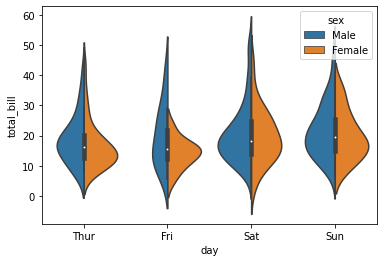

In [31]:
sns.violinplot(x='day',y='total_bill',data=tips,hue = 'sex',split = True)
#in violin plot we can have two categories plotted on the same line by putting the argument 'split' as True

**stripplot()**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

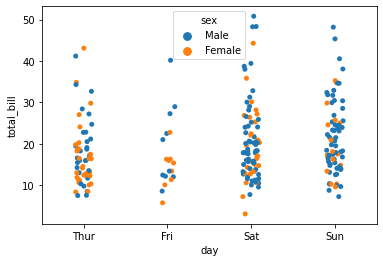

In [39]:
sns.stripplot(x='day',y='total_bill',data = tips,hue = 'sex')

**swarmplot()**

Swarmplot combines the ideas of a 'Violin Plot' and of a 'Strip Plot'

<AxesSubplot:xlabel='day', ylabel='total_bill'>

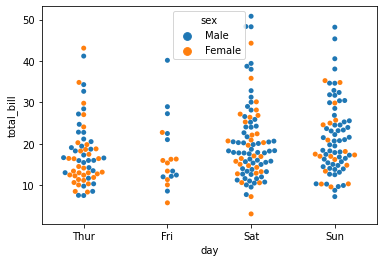

In [41]:
sns.swarmplot(x = 'day',y='total_bill',data = tips,hue = 'sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

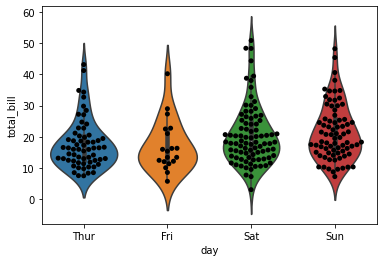

In [44]:
#we can combine violin plot and swarmplot over each other
sns.violinplot(x = 'day',y='total_bill',data = tips)
sns.swarmplot(x = 'day',y='total_bill',data = tips,color = 'black')

**factorplot()**

It is the most general form of all these plots

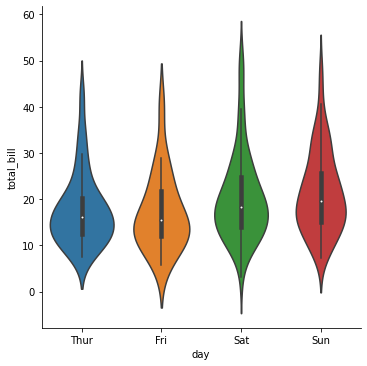

In [47]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

#we can call the kind of plot we want to plot

# MATRIX PLOT

In [49]:
#LOADING ANOTHER DATASET - FLIGHTS
flights = sns.load_dataset('flights')

In [50]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [52]:
tc = tips.corr()

**heatmap()**

<AxesSubplot:>

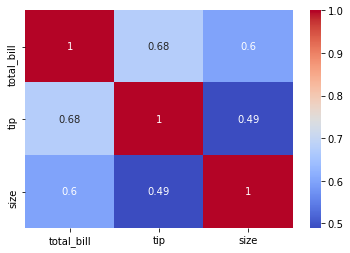

In [54]:
#for creating a heatmap, the data should be in a cross tab matrix
sns.heatmap(tc,annot = True,cmap = 'coolwarm')

#annot: will add annotation
#cmap: it is the color map

In [57]:
#now we will create a pivot table on the flights dataset for creating heatmap
fp = flights.pivot_table(index = 'month',columns = 'year',values = 'passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

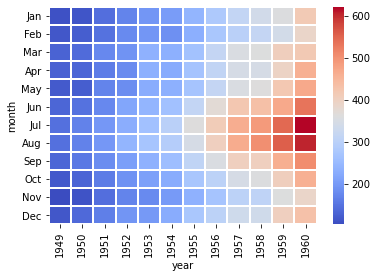

In [63]:
#now creating heatmap on the above created flight pivot table
sns.heatmap(fp,cmap = 'coolwarm',linecolor = 'white',linewidth = 1 )

#linecolor: we need to tell the color of the lines covering each tiles
#linewidth: is used to determine the width of the line so as to make each tile more visible

**clustermap()**

These are hierarchial cluster maps which also takes matrix

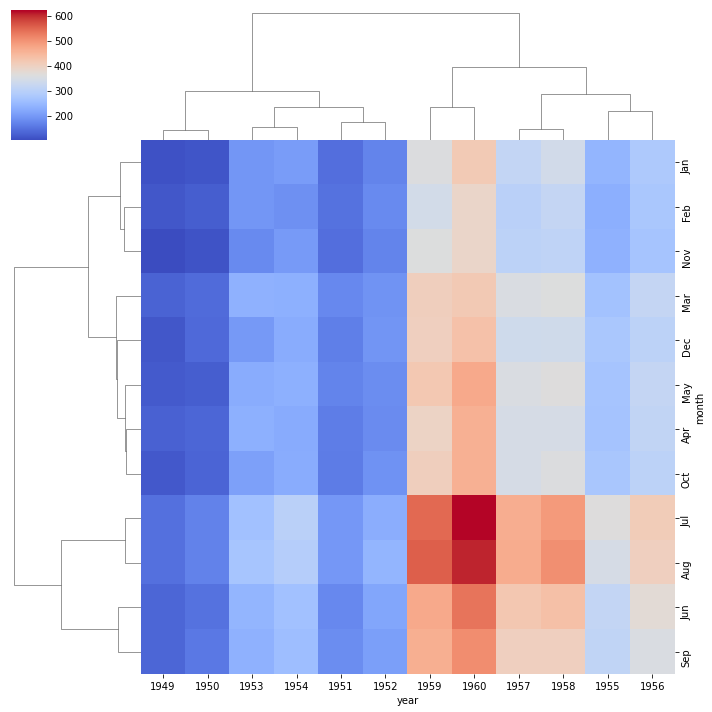

In [66]:
sns.clustermap(fp,cmap = 'coolwarm')

# GRIDS

In [67]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

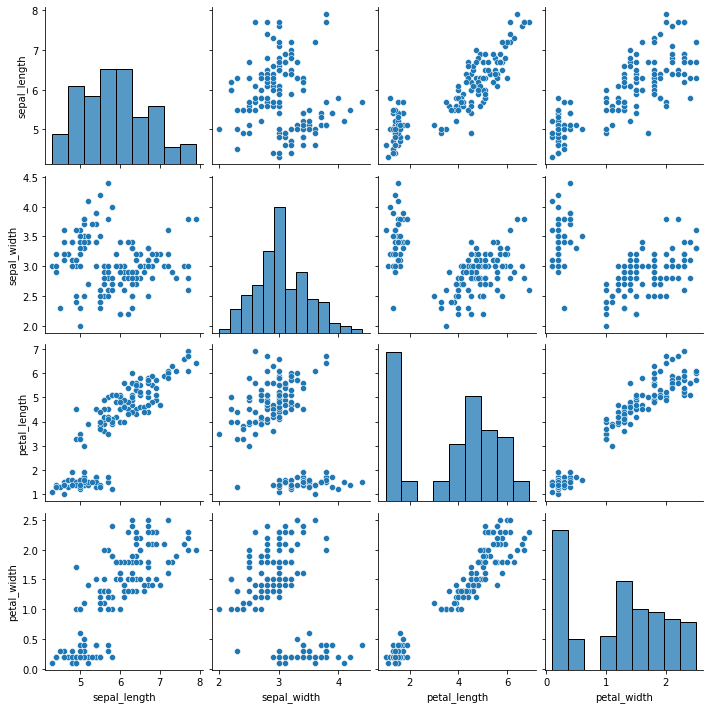

In [70]:
sns.pairplot(data = iris)

***PairGrid()***

PairGrid function gives us an empty canvas of the pair plots

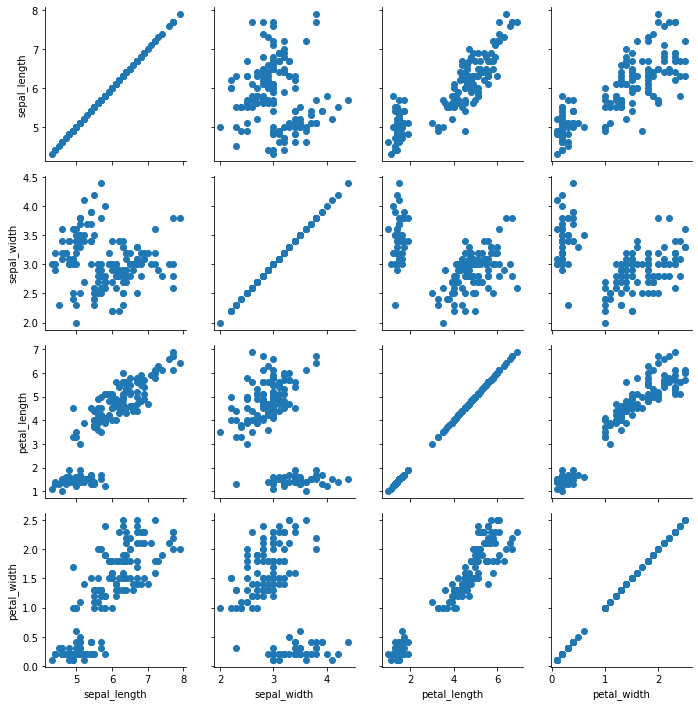

In [76]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

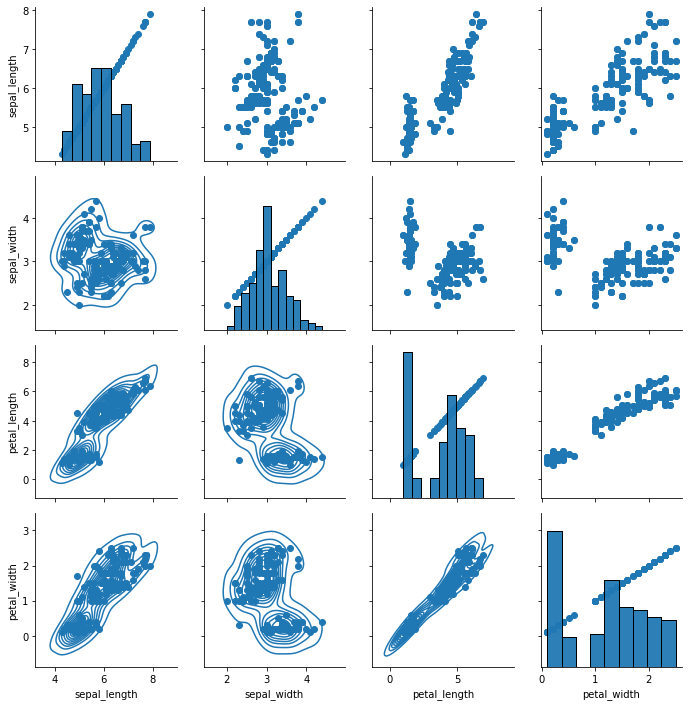

In [78]:
#now using PairGrid we can plot different plots based on the location of the subplot
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

**FacetGrid()**

Similar to PairGrid, FacetGrid also gives us a canvas of the plots on which we will need to map the visualization.

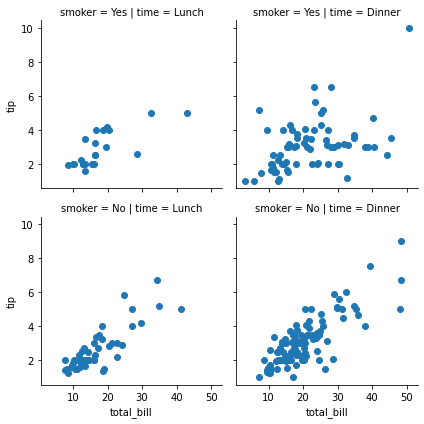

In [81]:
g = sns.FacetGrid(data = tips,col = 'time',row = 'smoker')
g.map(plt.scatter,'total_bill','tip')

# REGRESSION PLOTS

**Linear Model Plot ... lmplot()**

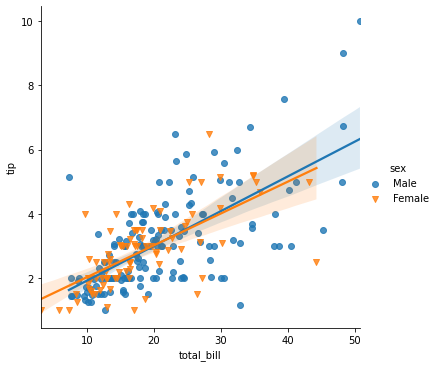

In [84]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue = 'sex',markers = ['o','v'])

In [85]:
"""
instead of mentioning the 'hue' argument, we can create two plots one for each male and female by passing in
col argument
"""



"\ninstead of mentioning the 'hue' argument, we can create two plots one for each male and female by passing in\ncol argument\n"

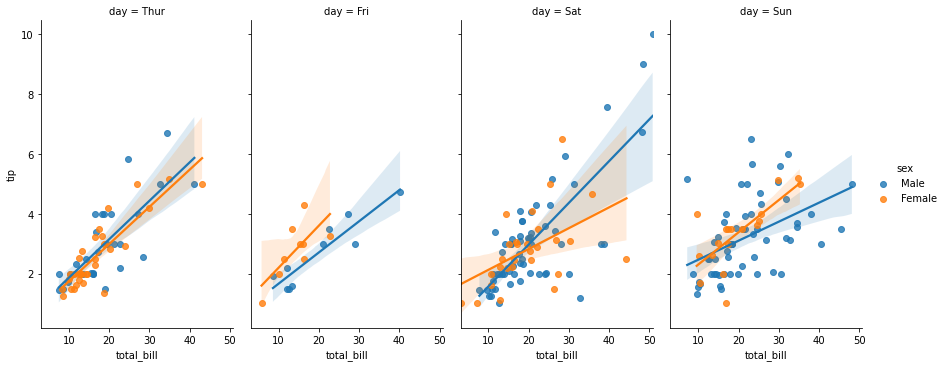

In [88]:
sns.lmplot(x='total_bill',y='tip',data=tips,col = 'day',
          hue = 'sex',
          aspect=0.6)

#col: this argument creates the number of columns for the plotds
#aspect: This argument is for adjusting the height and width of the plot

# STYLE AND COLOR

<AxesSubplot:xlabel='sex', ylabel='count'>

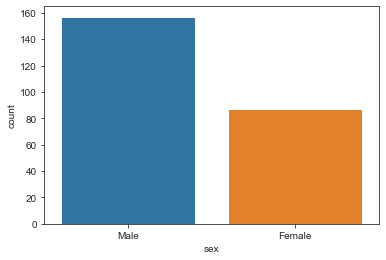

In [98]:
#sns.set_style('ticks') #This function will set the back ground of the plot


sns.countplot(x = 'sex',data = tips)

#sns.despine()   #This will remove the top and right spine from the plot

<AxesSubplot:xlabel='sex', ylabel='count'>

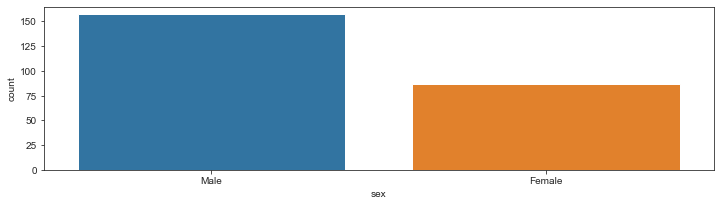

In [99]:
plt.figure(figsize = (12,3)) #we use Matplotlibs figsize along with seaborn to set the size of the plot
sns.countplot(x = 'sex',data = tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

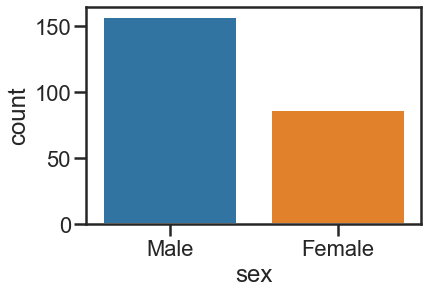

In [103]:
sns.set_context('poster') #this will change the font size of the plot. It is much larger than the previous plots
sns.countplot(x = 'sex',data = tips)

**Pallete and Color**

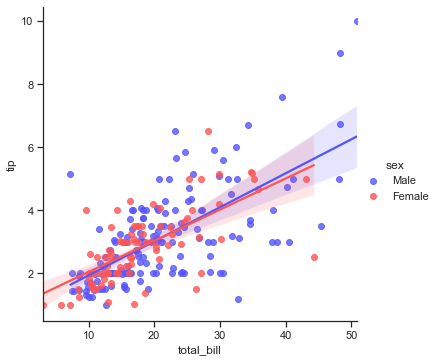

In [107]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data = tips,hue = 'sex',palette = 'seismic')